In [ ]:
# Matplotlib visualization function for comparing validation/train accuracy and Loss.
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
#This Function is meant to tag the labels to the Images, tqdm shows model training with a progress bar, for resizig all
# images to the same size and gves the path where all the images are loaded.
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
# specifies the path and location of each Label and its corresponding Images.
beans = '/content/drive/MyDrive/data/BEANS/'
cake = '/content/drive/MyDrive/data/CAKE'
candy = '/content/drive/MyDrive/data/CANDY'
cereal = '/content/drive/MyDrive/data/CEREAL'
chips = '/content/drive/MyDrive/data/CHIPS'
chocolate = '/content/drive/MyDrive/data/CHOCOLATE'
coffee = '/content/drive/MyDrive/data/COFFEE'
corn = '/content/drive/MyDrive/data/CORN'
fish = '/content/drive/MyDrive/data/FISH'
flour = '/content/drive/MyDrive/data/FLOUR'
honey = '/content/drive/MyDrive/data/HONEY'
jam = '/content/drive/MyDrive/data/JAM'
juice = '/content/drive/MyDrive/data/JUICE'
milk = '/content/drive/MyDrive/data/MILK'
nuts = '/content/drive/MyDrive/data/NUTS'
oil = '/content/drive/MyDrive/data/OIL'
pasta = '/content/drive/MyDrive/data/PASTA'
rice = '/content/drive/MyDrive/data/RICE'
soda = '/content/drive/MyDrive/data/SODA'
spices = '/content/drive/MyDrive/data/SPICES'
sugar = '/content/drive/MyDrive/data/SUGAR'
tea = '/content/drive/MyDrive/data/TEA'
tomato_sauce = '/content/drive/MyDrive/data/TOMATO_SAUCE'
vinegar = '/content/drive/MyDrive/data/VINEGAR'
water = '/content/drive/MyDrive/data/WATER'

X = []
Z = []
imgsize = 150

In [ ]:
# List of libraries to be imported .
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from imageio import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
#from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [ ]:
# Allocates the images meant for training, and the coressponding Label for the same.
training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#This function is used to Encode the Label from categorical value to a numerical value. 25 Labels to value between 0 and
# 24. This also scales the value and does tran test split.
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,25)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Does Image Augmentation with ImageDataGenerator function and performs 11 augmentation techniques , including horizontal 
# and vertical flip.
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

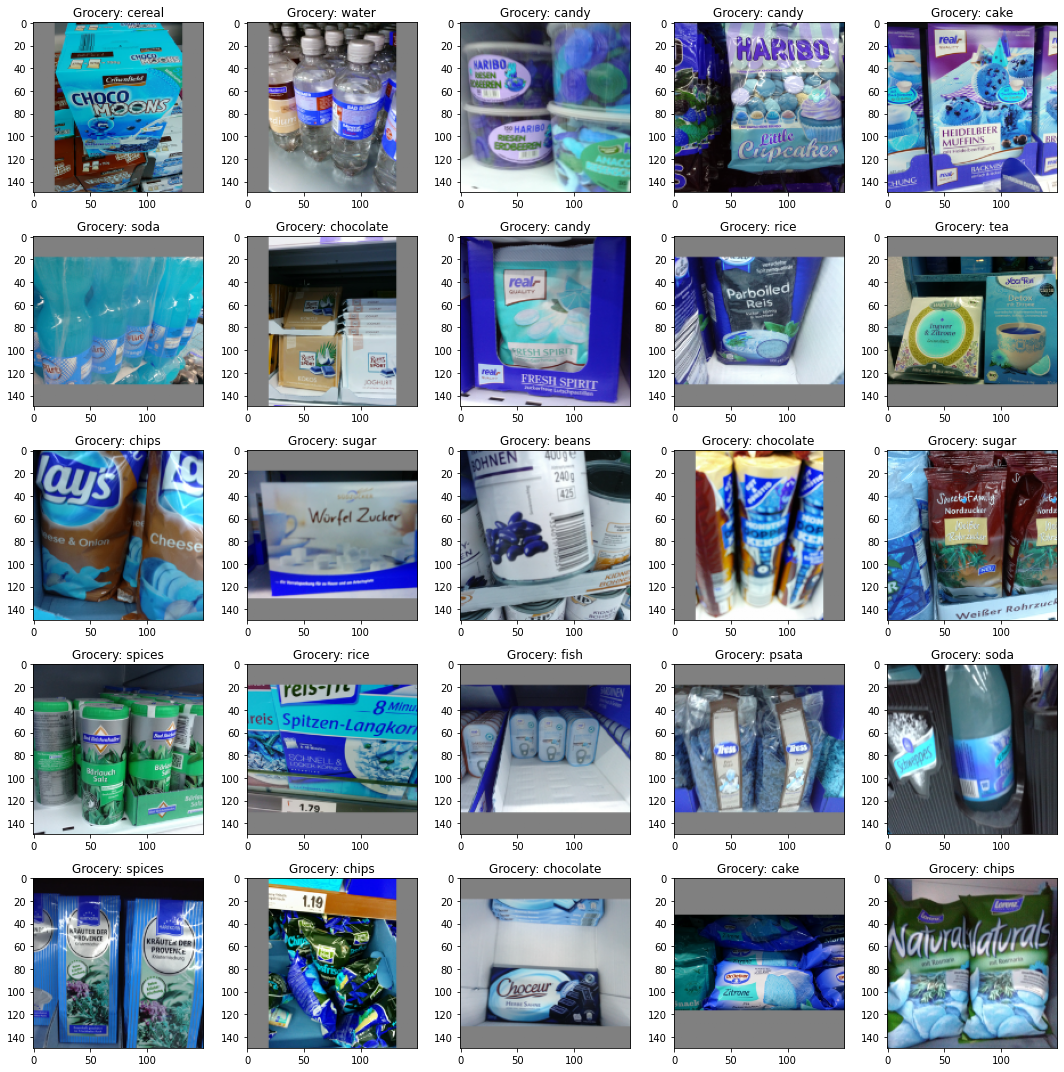

In [ ]:
# Once the images are scaled and treated, having a look at the samples of images.
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

58900480/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fe65a2b9750> False
<keras.layers.convolutional.Conv2D object at 0x7fe65003dd10> False
<keras.layers.convolutional.Conv2D object at 0x7fe650052d10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe64a2d6850> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2dc5d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2df9d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe64a2d64d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2e2850> False
<keras.layers.convolutional.Conv2D object at 0x7fe650052d50> False
<keras.layers.convolutional.Conv2D object at 0x7fe650038690> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe64a2eee90> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2f5190> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2fb6d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe64a2eedd0> F

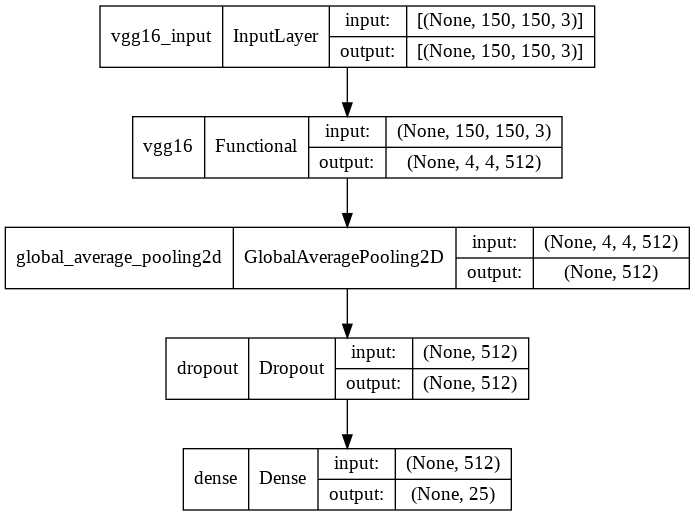

In [ ]:
'''
Creating the base VGG16 model and unfreezes the first and the last layer. the existing weights are unaltered and training
is not carried out. Base model is to mention that the model is not re trained and the weights from the imagenet pretrained model
is utilized. Sequential is used for its operation, Globalaveragepooling for the Pooling part, dropout is to drop out unwanted
neurons , Dense is to create a final output layer, with 25 neurons for the classes. Softmax is to provide probability scores
for all 25 categories, so that sum of it adds up to 1.

'''

base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(25,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



In [ ]:
model.save('grocery_model.hs')

INFO:tensorflow:Assets written to: grocery_model.hs\assets


In [ ]:
model

In [ ]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-3)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt1,
    metrics=['accuracy']
)

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = 100,
    steps_per_epoch  = 100,
    epochs = 50, 
    verbose = 1,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
 31/100 [========>.....................] - ETA: 28:48 - loss: 2.9100 - accuracy: 0.1787WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 5000 batches). You may need to use the repeat() function when building your dataset.


KeyError: ignored

In [ ]:
model

KeyError: ignored

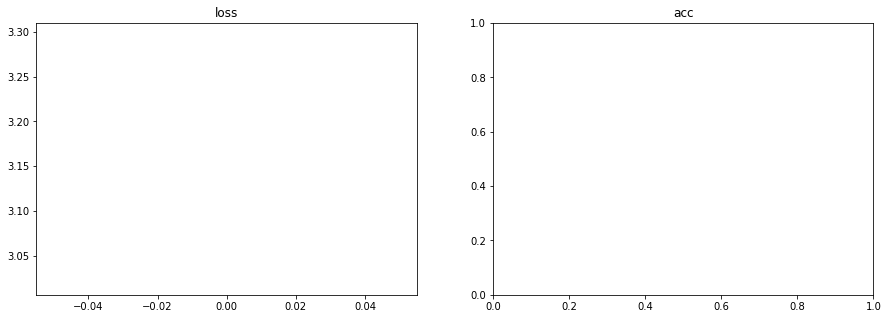

In [ ]:
show_final_history(history)
model.load_weights('./base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

from IPython.display import Image
Image(filename='../img1.png',width=800, height=400)